In [1]:
import numpy as np
from matplotlib import pyplot as plt

## 图像处理-ndimage

### 形态学图像处理

In [2]:
import numpy as np

def expand_image(img, value, out=None, size=10):
    """
    将输入的图像进行扩展显示
    
    参数：
    img: 要扩展显示的图像
    value: 扩展后图像中非零像素的值
    out: 可选参数，用于填充扩展图像的输出图像
    size: 扩展的倍数，默认为10
    
    返回值：
    扩展后的图像
    
    """
    if out is None:
        w, h = img.shape
        out = np.zeros((w*size, h*size), dtype=np.uint8)

    tmp = np.repeat(np.repeat(img, size, axis=0), size, axis=1)
    out[:, :] = np.where(tmp, value, out)
    out[::size, :] = 0
    out[:, ::size] = 0
    return out

def show_image(*imgs):
    """
    显示多个图像
    
    参数：
    *imgs: 要显示的图像，可变参数
    
    """
    for idx, img in enumerate(imgs, 1):
        ax = plt.subplot(1, len(imgs), idx)
        plt.imshow(img, cmap="gray")
        ax.set_axis_off()
    plt.subplots_adjust(0.02, 0, 0.98, 1, 0.02, 0)
# 定义了一个函数 expand_image(img, value, out=None, size=10)，用于将输入的图像进行扩展显示。

# 参数 img 是要扩展显示的图像，value 是扩展后图像中非零像素的值，out 是可选参数，用于填充扩展图像的输出图像，size 是扩展的倍数，默认为 10。

# 如果 out 参数为 None，根据输入图像的形状创建一个与输入图像对应的全零数组。

# 通过 np.repeat() 函数对输入图像 img 进行重复扩展，沿着两个维度分别重复 size 次。

# 使用 np.where() 函数将重复扩展后的图像 tmp 中非零元素对应位置的像素值修改为输入 value。

# 将扩展后的图像的每隔 size 行和每隔 size 列的像素值设为 0，用于显示网格效果。

# 返回扩展后的图像 out。

# 定义了一个函数 show_image(*imgs)，用于显示多个图像。

# 使用循环遍历输入的图像 imgs，在子图中绘制每个图像。

# 设置子图的坐标轴关闭，并调整子图的位置。

# 完成图像的显示。

#### 膨胀和腐蚀

C:\Users\hechang\AppData\Local\Temp\ipykernel_22312\781429689.py:5: DeprecationWarning: Please use `binary_dilation` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  b = morphology.binary_dilation(a, structure)


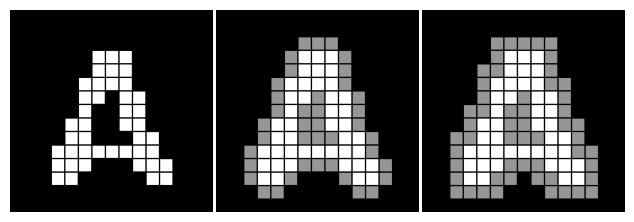

In [3]:
#%fig=四连通和八连通的膨胀运算
from scipy.ndimage import morphology

def dilation_demo(a, structure=None):
    b = morphology.binary_dilation(a, structure)
    img = expand_image(a, 255)
    return expand_image(np.logical_xor(a, b), 150, out=img)

a = plt.imread("scipy_morphology_demo.png")[:, :, 0].astype(np.uint8)
img1 = expand_image(a, 255)

img2 = dilation_demo(a)
img3 = dilation_demo(a, [[1, 1, 1], [1, 1, 1], [1, 1, 1]])
show_image(img1, img2, img3)
# 导入 scipy.ndimage 中的 morphology 模块，用于进行形态学的二值膨胀运算。

# 定义了一个名为 dilation_demo(a, structure=None) 的函数，用于演示膨胀运算。

# 使用 morphology.binary_dilation() 函数对输入图像 a 进行二值膨胀运算，其中 structure 参数指定结构元素。

# 使用 expand_image() 函数将输入图像 a 扩展，像素值设为 255。

# 使用 expand_image() 函数将二值膨胀运算结果与输入图像的异或结果扩展，像素值设为 150。

# 在图形中显示经过扩展的原始图像、二值膨胀运算结果与输入图像的异或结果的图像。

# 调用 show_image() 函数显示图像。

# 使用 plt.imread() 函数读取演示图像 "scipy_morphology_demo.png"，并转换为灰度图像。

# 使用 expand_image() 函数将原始图像 a 扩展，像素值设为 255，保存在 img1 中。

# 调用 dilation_demo() 函数对原始图像 a 进行膨胀运算，将结果保存在 img2 中。

# 调用 dilation_demo() 函数，structure 参数指定为一个 3x3 的全 1 结构元素，对原始图像 a 进行膨胀运算，将结果保存在 img3 中。

# 调用 show_image() 函数显示三个图像 img1、img2、img3。

C:\Users\hechang\AppData\Local\Temp\ipykernel_22312\781429689.py:5: DeprecationWarning: Please use `binary_dilation` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  b = morphology.binary_dilation(a, structure)


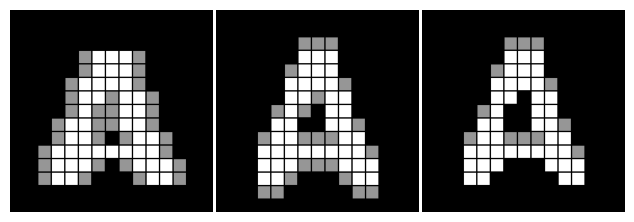

In [4]:
#%fig=不同结构元素的膨胀效果
img4 = dilation_demo(a, [[0,0,0],[1,1,1],[0,0,0]])
img5 = dilation_demo(a, [[0,1,0],[0,1,0],[0,1,0]])
img6 = dilation_demo(a, [[0,1,0],[0,1,0],[0,0,0]])
show_image(img4, img5, img6)

C:\Users\hechang\AppData\Local\Temp\ipykernel_22312\1597993210.py:3: DeprecationWarning: Please use `binary_erosion` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  b = morphology.binary_erosion(a, structure)


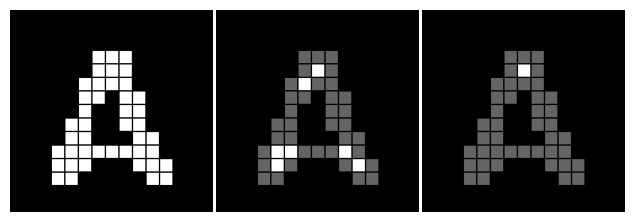

In [5]:
#%fig=四连通和八连通的腐蚀运算
def erosion_demo(a, structure=None):
    b = morphology.binary_erosion(a, structure)
    img = expand_image(a, 255)
    return expand_image(np.logical_xor(a, b), 100, out=img)

img1 = expand_image(a, 255)
img2 = erosion_demo(a)
img3 = erosion_demo(a, [[1, 1, 1], [1, 1, 1], [1, 1, 1]])
show_image(img1, img2, img3)
# 定义了一个名为 erosion_demo(a, structure=None) 的函数，用于演示腐蚀运算。

# 使用 morphology.binary_erosion() 函数对输入图像 a 进行二值腐蚀运算，其中 structure 参数指定结构元素。

# 使用 expand_image() 函数将输入图像 a 扩展，像素值设为 255。

# 使用 expand_image() 函数将二值腐蚀运算结果与输入图像的异或结果扩展，像素值设为 100。

# 在图形中显示经过扩展的原始图像、二值腐蚀运算结果与输入图像的异或结果的图像。

# 调用 show_image() 函数显示图像。

# 使用 expand_image() 函数将原始图像 a 扩展，像素值设为 255，保存在 img1 中。

# 调用 erosion_demo() 函数对原始图像 a 进行腐蚀运算，将结果保存在 img2 中。

# 调用 erosion_demo() 函数，structure 参数指定为一个 3x3 的全 1 结构元素，对原始图像 a 进行腐蚀运算，将结果保存在 img3 中。

# 调用 show_image() 函数显示三个图像 img1、img2、img3。

#### Hit和Miss

C:\Users\hechang\AppData\Local\Temp\ipykernel_22312\4105801279.py:3: DeprecationWarning: Please use `binary_hit_or_miss` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  b = morphology.binary_hit_or_miss(a, structure1, structure2)


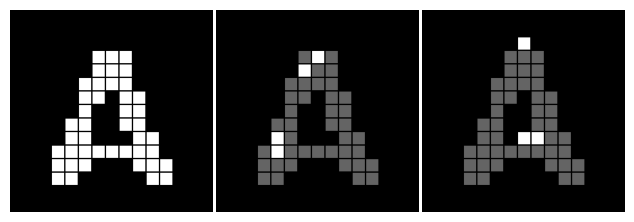

In [6]:
#%fig=Hit和Miss运算
def hitmiss_demo(a, structure1, structure2):
    b = morphology.binary_hit_or_miss(a, structure1, structure2)
    img = expand_image(a, 100)
    return expand_image(b, 255, out=img)

img1 = expand_image(a, 255)

img2 = hitmiss_demo(a, [[0, 0, 0], [0, 1, 0], [1, 1, 1]], [[1, 0, 0], [0, 0, 0], [0, 0, 0]])
img3 = hitmiss_demo(a, [[0, 0, 0], [0, 0, 0], [1, 1, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 0]])

show_image(img1, img2, img3)
# 定义了一个名为 hitmiss_demo(a, structure1, structure2) 的函数，用于演示 Hit and Miss 运算。

# 使用 morphology.binary_hit_or_miss() 函数对输入图像 a 进行 Hit and Miss 运算，其中 structure1 和 structure2 参数指定了两个结构元素。

# 使用 expand_image() 函数将输入图像 a 扩展，像素值设为 100。

# 使用 expand_image() 函数将 Hit and Miss 运算结果扩展，像素值设为 255。

# 在图形中显示经过扩展的原始图像和 Hit and Miss 运算结果的图像。

# 调用 show_image() 函数显示图像。

# 使用 expand_image() 函数将原始图像 a 扩展，像素值设为 255，保存在 img1 中。

# 调用 hitmiss_demo() 函数对原始图像 a 进行 Hit and Miss 运算，将结果保存在 img2 中，structure1 和 structure2 参数分别指定为两个结构元素。

# 调用 hitmiss_demo() 函数对原始图像 a 进行 Hit and Miss 运算，将结果保存在 img3 中，structure1 和 structure2 参数分别指定为两个结构元素。

# 调用 show_image() 函数显示三个图像 img1、img2、img3。

C:\Users\hechang\AppData\Local\Temp\ipykernel_22312\3846724954.py:18: DeprecationWarning: Please use `binary_hit_or_miss` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  hm = morphology.binary_hit_or_miss(img, hit, miss) #❸


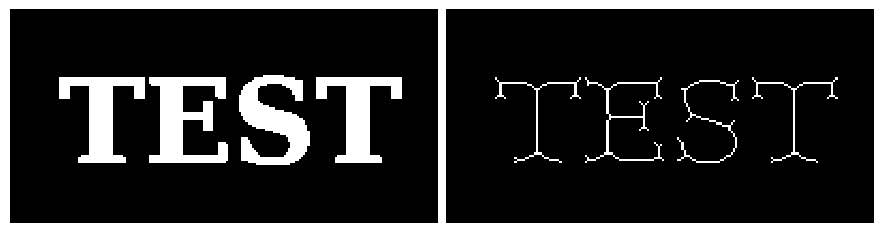

In [7]:
#%fig=使用Hit和Miss进行细线化运算
def skeletonize(img):
    h1 = np.array([[0, 0, 0],[0, 1, 0],[1, 1, 1]]) #❶
    m1 = np.array([[1, 1, 1],[0, 0, 0],[0, 0, 0]]) 
    h2 = np.array([[0, 0, 0],[1, 1, 0],[0, 1, 0]]) 
    m2 = np.array([[0, 1, 1],[0, 0, 1],[0, 0, 0]])    
    hit_list = [] 
    miss_list = []
    for k in range(4): #❷
        hit_list.append(np.rot90(h1, k))
        hit_list.append(np.rot90(h2, k))
        miss_list.append(np.rot90(m1, k))
        miss_list.append(np.rot90(m2, k))    
    img = img.copy()
    while True:
        last = img
        for hit, miss in zip(hit_list, miss_list): 
            hm = morphology.binary_hit_or_miss(img, hit, miss) #❸
            # 从图像中删除hit_or_miss所得到的白色点
            img = np.logical_and(img, np.logical_not(hm)) #❹
        # 如果处理之后的图像和处理前的图像相同，则结束处理
        if np.all(img == last): #❺
            break
    return img

a = plt.imread("scipy_morphology_demo2.png")[:,:,0].astype(np.uint8)
b = skeletonize(a)
#%hide
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
ax1.imshow(a, cmap="gray", interpolation="nearest")
ax2.imshow(b, cmap="gray", interpolation="nearest")
ax1.set_axis_off()
ax2.set_axis_off()
plt.subplots_adjust(0.02, 0, 0.98, 1, 0.02, 0)

# 这段代码实现了图像的细化（skeletonize）操作，通过将图像中的线条化为最细的单像素线条。它使用了`scipy`库的`morphology`模块来进行处理。

# - 首先定义了一系列的结构元素`h1`、`m1`、`h2`、`m2`，这些结构元素用于判断图像中的点是否需要细化。
# - 然后定义了`hit_list`和`miss_list`，分别用来存储不同旋转角度下的结构元素，用于后续的循环处理。
# - 接下来进入一个`while`循环，不断进行细化操作，直到处理之后的图像和处理前的图像相同。
# - 在循环中，通过调用`morphology.binary_hit_or_miss`函数来判断图像的每个像素点是否符合细化的条件。
# - 根据判断结果，使用逻辑运算来删除不符合条件的像素点。
# - 最后返回细化之后的图像。

# 在代码的最后，使用`matplotlib`库来显示原始图像和细化之后的图像。

### 图像分割

In [8]:
squares = plt.imread("suqares.jpg")
squares = (squares[:,:,0] < 200).astype(np.uint8) 

In [9]:
from scipy.ndimage import morphology
squares_dt = morphology.distance_transform_cdt(squares)
print ("各种距离值", np.unique(squares_dt))

squares_core = (squares_dt > 8).astype(np.uint8)

各种距离值 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


C:\Users\hechang\AppData\Local\Temp\ipykernel_22312\4188247274.py:2: DeprecationWarning: Please use `distance_transform_cdt` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  squares_dt = morphology.distance_transform_cdt(squares)


In [10]:
squares_core = (squares_dt > 8).astype(np.uint8)

In [12]:
from scipy.ndimage.measurements import label, center_of_mass

def random_palette(labels, count, seed=1):
    np.random.seed(seed)
    palette = np.random.rand(count+1, 3)
    palette[0,:] = 0
    return palette[labels]

labels, count = label(squares_core)
h, w = labels.shape
centers = np.array(center_of_mass(labels, labels, index=range(1, count+1)), np.int32)
cores = random_palette(labels, count)

C:\Users\hechang\AppData\Local\Temp\ipykernel_22312\2333616153.py:1: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label, center_of_mass
C:\Users\hechang\AppData\Local\Temp\ipykernel_22312\2333616153.py:1: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label, center_of_mass


In [13]:
index = morphology.distance_transform_cdt(1-squares_core, 
                                          return_distances=False, 
                                          return_indices=True) #❶
near_labels = labels[index[0], index[1]] #❷

mask = (squares - squares_core).astype(bool)
labels2 = labels.copy()
labels2[mask] = near_labels[mask] #❸
separated = random_palette(labels2, count)

C:\Users\hechang\AppData\Local\Temp\ipykernel_22312\2114735981.py:1: DeprecationWarning: Please use `distance_transform_cdt` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  index = morphology.distance_transform_cdt(1-squares_core,


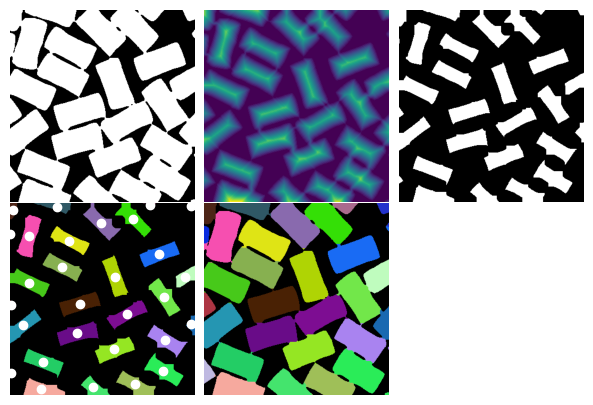

In [14]:
#%figonly=矩形区域分割算法各个步骤的输出图像
fig, axes = plt.subplots(2, 3, figsize=(7.5, 5.0), )
fig.delaxes(axes[1, 2])
axes[0, 0].imshow(squares, cmap="gray");
axes[0, 1].imshow(squares_dt)
axes[0, 2].imshow(squares_core, cmap="gray")
ax = axes[1, 0]
ax.imshow(cores)
center_y, center_x = centers.T
ax.plot(center_x, center_y, "o", color="white")
ax.set_xlim(0, w)
ax.set_ylim(h, 0)

axes[1, 1].imshow(separated)

for ax in axes.ravel():
    ax.axis("off")
    
fig.subplots_adjust(wspace=0.01, hspace=0.01)